# Tutorial Pandas

En este tutorial se muestran los comandos de Pandas que más se utilizan para el **tratamiento de datos**. Para una mejor visualización de los datos se van a utilizar librerias como **MatplotLib** o **Numpy**.
 
## Set de datos utilizados para el tutorial

https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

## Comandos


#### Importar Pandas al Ambiente de Trabajo

Como convención se suele importar la librería de **Pandas** como pd.

In [133]:
import pandas as pd

#### .DataFrame

El comando .DataFrame se utiliza para darle un formato mucho más legible a datos que no cuentan con ningún tipo de formato preelimar que sea fácil para su análisis y visualización. Para el ejemplo se va a utilizar un diccionario de datos, en este se puede observar como cada entrada del diccionario posteriormente se convierte en un columna de la tabla. Es muy común encontrarse diccionarios de este tipo. Como se observa en el ejemplo, visualmente es mucho más sencilla la lectura de los datos una vez se le aplica el comando **DataFrame**.

In [134]:
diccionario = { 'Time (S)': [1, 2, 3, 4, 5, 6],
                'Temperature (C°)': [35, 35.6, 40, 41, 43.5, 46],
                'Frecuencia (GHz)': [2.2, 4.4, 4.4, 4.4, 4.4, 4.4]}
DataFrame =  pd.DataFrame (diccionario)

print(diccionario)
DataFrame

{'Time (S)': [1, 2, 3, 4, 5, 6], 'Temperature (C°)': [35, 35.6, 40, 41, 43.5, 46], 'Frecuencia (GHz)': [2.2, 4.4, 4.4, 4.4, 4.4, 4.4]}


,Time (S),Temperature (C°),Frecuencia (GHz)
0,1,35.0,2.2
1,2,35.6,4.4
2,3,40.0,4.4
3,4,41.0,4.4
4,5,43.5,4.4
5,6,46.0,4.4


#### .read_csv / .head ( )

El comando .read_csv se utiliza para la lectura de los datos un archivo de extensión **csv**. Por otro lado si se desea visualizar una cantidad específica de filas, se utiliza el comando .head( ) indicando dentro del paréntesis la cantidad de filas que se desean observar. 

In [135]:
df = pd.read_csv(r"C:\Users\vernyjmo\Google Drive\Maestria\5 Cuatrimestre\Reconocimiento de Patrones\Tarea1\Suicide_Rates_1985-2016.csv")

df.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


#### .iloc [ ] /  .iat ( ) / ix[ ]

El comando **iloc** o **iat** se utilizan para tomar un dato en específico. Recibe como parámetros el número de columna y fila de la tabla de datos. En el siguiente ejemplo se toma el valor **4.59** el cual se encuentra en la fila 3 y columna 6; es importante mencionar que el conteo se inicia en cero.

Es importante denotar la diferencia en utilizar uno de los dos comandos. Al utilizar **iloc** el procesamiento computacional va a ser mayor ya que toma en cuenta otros factores como el nombre de columna y fila, mientras que **iat** únicamente toma el dato que se desea, por lo que su ejecución es mucho más rapida.

In [136]:
print(df.iloc[[3],[6]])
print("----------------------")
print(df.iat[3,6])

   suicides/100k pop
3               4.59
----------------------
4.59


#### .loc [ ] / .at ( )

El comando **loc** se utiliza para localizar un valor específico dando como argumento el nombre de la columna o fila. A continuación se muestran variaciones de este. 

Es muy útil para generar nuevas tablas a partir de algunos parámetros o restricciones.

In [137]:
df.loc[[0, 1]]

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [138]:
df.loc[0, 'sex']

'male'

In [139]:
df_loc=df.loc[df['suicides_no'] > 20000]

#### .fillna ( ) / .dropna ( ) / .mean( )

Como se observa en la tabla anterior existe una columna que cuenta con valores **NaN**, esto quiere decir que son filas con espacios en blancos. Depende de lo que se necesite así el comando que se utilice.

El comando **fillna** se puede utilizar de varias maneras, la primera es rellenando todas las columnas con algún espacio en blanco con el argumento indicado; este argumento puede ser un número específico o bien un análisis estadístico, como el promedio de la misma columna por ejemplo, algo que es muy utilizado. El segundo modo de utilizar este parámetro es seleccionando manualmente la columna que se quiera rellenar, sabiendo antes que esta tiene valors en blanco.

El comando **dropna** se utiliza para eliminar columnas que contengan espacios en blanco, dependiendo del argumento se pueden eliminar todas las columnas, o bien configurar el algoritmo para que se cumplan ciertas condiciones y así escoger que columnas eliminar.

El comando **mean** se utiliza para sacar la media de la columna.

In [140]:
df.head(1000).style.highlight_null(null_color='red')


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,nan,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,nan,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,nan,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,nan,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,nan,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,nan,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,nan,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,nan,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,nan,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0,Albania1987,nan,"2,156,624,900",796,Generation X


In [141]:
df_fillna = df.head(2000).fillna(df.mean()) #rellena espacios en blanco por la media de la columna
df_fillna.iloc[:5,[8]]

,HDI for year
0,0.776601
1,0.776601
2,0.776601
3,0.776601
4,0.776601


In [142]:
df_dropna_all = df.head(10).dropna(axis=1, how='all') 
df_dropna_all.head(10) 

#Se analizan las primeras diez filas, y como se puede observar todas eran Nan por lo que no aparecen a continuación
#Se puede utilizar el argumento 'any' que quita la columna con que uno de los datos sea Nan

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,"2,156,624,900",796,Generation X


In [143]:
df_dropna_all_thresh = df.head(1000).dropna(thresh=12) 
df_dropna_all_thresh.head(10)

#Mantiene las filas que tienen no más de 12 valores faltantes

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X
77,Albania,1995,male,75+ years,1,25100,3.98,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
78,Albania,1995,male,35-54 years,14,375900,3.72,Albania1995,0.619,"2,424,499,009",835,Boomers
79,Albania,1995,female,25-34 years,7,264000,2.65,Albania1995,0.619,"2,424,499,009",835,Generation X
80,Albania,1995,female,35-54 years,8,356400,2.24,Albania1995,0.619,"2,424,499,009",835,Boomers
81,Albania,1995,male,5-14 years,6,376500,1.59,Albania1995,0.619,"2,424,499,009",835,Millenials


#### .count ( )

Indica la cantidad de posiciones que tienen valores.

In [149]:
df.count()

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
country-year          27820
HDI for year           8364
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64

#### .to_csv ( )

Convierte el diccionario en un archivo de tipo **csv**. El archivo se guarda en la carpeta donde estamos trabajando, o bien se le puede asignar un nuevo directorio.


In [150]:
df.to_csv('New_File.csv')

## Otros Ejemplos

In [155]:
import matplotlib.pyplot as plt
import numpy as np


### Gráfica de datos x vs y

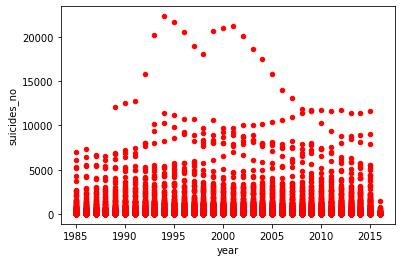

In [163]:
df.plot(kind='scatter',x='year',y='suicides_no',color='red')
plt.show()

### Gráfico de Barras

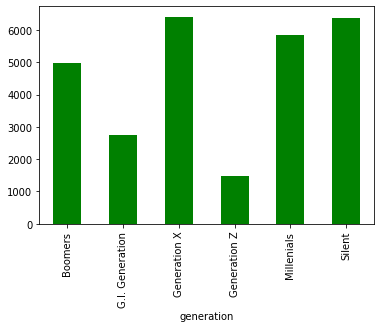

In [174]:
df.groupby('generation').size().plot(kind='bar',stacked = True, x='year',y='suicides_no',color='green')
plt.show()

### Utilizar varios identificadores para segregar los datos

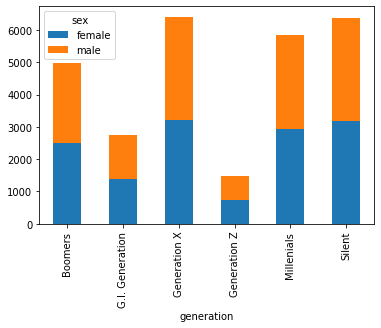

In [179]:
df.groupby(['generation','sex']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

Como se puede observar utilizar Pandas junto con otras librerías como Matplotlib, facilita la visualización de los datos y así poder entender mejor que está sucediendo con los mismos.